# Plot LDSC results

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
setwd("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/Jinghui_data/LDSC/")

In [3]:
LDSC.results <- read.table("ldsc_aggregate.tsv", header = TRUE, sep = '\t')

In [4]:
unique(LDSC.results$subclass)

[1] "Chandelier" "OPC"        "LAMP5_LHX6" "VIP"        "L6B"       
 [6] "LAMP5"      "SNCG"       "SST"        "SST_CHODL"  "PAX6"      
[11] "VLMC"       "L5_ET"      "L4_IT"      "Oligo"      "L6_IT_Car3"
[16] "L6_CT"      "L6_IT"      "L5_IT"      "Endo"       "PVALB"     
[21] "L5_6_NP"    "L2_3_IT"    "Astro"      "Micro_PVM"

In [5]:
subclass.order <- c(
    'L2_3_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L6_CT', 'L6B', 'L5_6_NP', 'L5_ET',
    'LAMP5', 'LAMP5_LHX6', 'PVALB', 'SST', 'SST_CHODL', 'PAX6', 'SNCG', 'VIP', 'Chandelier',
    'Oligo', 'Astro', 'Micro_PVM', 'OPC', 'Endo', 'VLMC'
)

In [6]:
traits <- c(
"Arvanitis.NatCommun.2019.Heart_Failure",
#"Astle.Cell.2016.Basophil_count",
#"Astle.Cell.2016.Eosinophil_count",
#"Astle.Cell.2016.Lymphocyte_count",
#"Astle.Cell.2016.Monocyte_count",
#"Astle.Cell.2016.Neutrophil_count",
"Aylward.2018.biorxiv.Type_1_Diabetes",
#"Barban.NatGenet.2016.Age_First_Birth",
"Barban.NatGenet.2016.Number_Children_Born",
"Bentham.NatGenet.2015.Lupus",
"Bentham.NatGenet.2015.Systemic_lupus_erythematosus",
"Bronson.NatGenet.2016.IgA_deficiency",
"Chiou.Nature.2021.Type_1_diabetes",
"Cordell.NatCommun.2015.Primary_Biliary_Cirrhosis",
"Deary.MolPsychiatry.2017.Tiredness",
"deLange.NatGenet.2017.Crohns_Disease",
"deLange.NatGenet.2017.Inflammatory_Bowel_Disease",
"deLange.NatGenet.2017.Ulcerative_Colitis",
"Demenais.NatGenet.2018.Asthma",
"Demontis.NatGenet.2019.Attention_Deficit_Hyperactivity_Disorder",
"denHoed.NatGenet.2013.Heart_Rate",
"Dubois.NatGenet.2010.Celiacs_Disease",
#"Duncan.AmJPsychiatry.2017.Anorexia_Nervosa",
#"Dupuis.NatGenet.2010.HOMA-B",
#"Dupuis.NatGenet.2010.HOMA-IR",
#"EAGLE.AmJMedGenet.2016.Childhood_Aggression",
"EAGLE.NatGenet.2015.Atopic_Dermatitis",
#"Felix.HumMolGenet.2015.Childhood_BMI",
#"Ferreira.2019.AJHG.Asthma_child_onset",
"Ferreira.NatGenet.2017.Allergy",
"GLGC.NatGenet.2013.HDL_Cholesterol",
"GLGC.NatGenet.2013.LDL_Cholesterol",
"GLGC.NatGenet.2013.Total_Cholesterol",
#"GLGC.NatGenet.2013.Triglycerides",
"Grove.NatGenet.2019.Autism_Spectrum_Disorder",
#"Hammerschlag.NatGenet.2017.Insomnia",
"Hoffmann.NatGenet.2018.HDL_cholesterol",
"Hoffmann.NatGenet.2018.LDL_cholesterol",
"Hoffmann.NatGenet.2018.Total_cholesterol",
"Hoffmann.NatGenet.2018.Triglycerides",
"Horikoshi.Nature.2016.Birth_Weight",
#"Hou.HumMolGenet.2016.Bipolar_Disorder",
#"IMSGC.NatGenet.2011.Multiple_Sclerosis",
"IMSGC.Science.2019.Multiple_sclerosis",
"Jansen.2019.NatGenet.Insomnia",
#"Jansen.NatGenet.2019.Alzheimers_disease",
"Jansen.NatGenet.2019.Alzheimers_Disease",
"Jiang.NatGenet.2018.Vitamin_D",
"Ji.NatGenet.2017.Primary_Sclerosing_Cholangitis",
"Jin.NatGenet.2016.Autoimmune_vitiligo",
#"Jin.NatGenet.2016.Vitiligo",
"Jones.PLOSGen.2016.Chronotype",
"Jones.PLOSGen.2016.Sleep_Duration",
"Kemp.NatGenet.2017.Heel_bone_mineral_density",
"Kilpelainen.NatCommun.2016.Leptin",
"Lambert.NatGenet.2013.Alzheimers_Disease",
#"Locke.Nature.2015.BMI",
"Luciano.NatGenet.2017.Neuroticism",
"Mahajan.NatGenet.2018.Type_2_Diabetes",
"Malik.2018.NatGenet.Stroke",
"Manning.NatGenet.2012.Fasting_Glucose",
#"Manning.NatGenet.2012.Fasting_Glucose_adj_BMI",
"Manning.NatGenet.2012.Fasting_Insulin",
#"Manning.NatGenet.2012.Fasting_Insulin_adj_BMI",
#"Marinelli.Sleep.2016.Child_Sleep_Duration",
"Michailidou.Nature.2017.Breast_cancer",
"Namjou.BMCMed.2019.Nonalcoholic_fatty_liver_disease",
"Nelson.NatGenet.2017.Coronary_Artery_Disease",
"Nielson.2018.NatGenet.Atrial_Fibrillation",
"Okada.Nature.2014.Rheumatoid_Arthritis",
#"Okbay.Nature.2016.Educational_Attainment",
"Pattaro.NatCommun.2016.Chronic_Kidney_Disease",
"PGC.MolPsychiatry.2017.Obsessive_Compulsive_Disorder",
"PGC.MolPsychiatry.2017.Post_Traumatic_Stress_Disorder",
"PGC.Nature.2014.Schizophrenia",
#"ReproGen.NatGenet.2015.Age_At_Menopause",
#"ReproGen.NatGenet.2017.Age_At_Menarche",
"SAIGE.UKBB.2018.Tobacco_use_disorder",
"Sakornsakolpat.NatGenet.2019.Chronic_obstructive_pulmonary_disease",
"Savage.NatGenet.2018.Intelligence",
#"Saxena.NatGenet.2010.2hr_Glucose_adjBMI",
"Schafmayer.Gut.2019.Diverticular_disease",
"Schumann.PNAS.2016.Alcohol_Usage",
#"Shadrina.PLoSGenet.2019.Varicose_veins",
#"Shrine.NatGenet.2019.FEV1_FVC_ratio",
#"Shrine.NatGenet.2019.Forced_expiration_volume",
#"Shrine.NatGenet.2019.Forced_vital_capacity",
#"Shrine.NatGenet.2019.Peak_expiratory_flow",
#"Sniekers.NatGenet.2017.Intelligence",
"Stahl.2018.biorxiv.Bipolar_Disorder",
"Strawbridge.Diabetes.2011.Fasting_ProInsulin",
"Taal.NatGenet.2012.Head_Circumference",
"Tachmazidou.NatGenet.2019.Osteoarthritis",
"Teumer.Diabetes.2016.Microalbuminuria",
"Teumer.NatCommun.2018.Thyroid_stimulating_hormone",
"Tin.NatGenet.2019.Gout",
#"Tin.NatGenet.2019.Serum_urate",
"UKB.Neale_v2.2018.Body_mass_index",
"UKB.Neale_v2.2018.Standing_height",
#"UKB.Neale_v2.2018.Vitamin_D",
#"vandenBerg.BehavGenet.2016.Extraversion",
"vanderValk.HumMolGenet.2014.Birth_Length",
"vanRheenen.NatGenet.2016.Amyotrophic_Lateral_Sclerosis",
#"Watanabe.NatGenet.2019.Diastolic_blood_pressure",
#"Watanabe.NatGenet.2019.Pulse_rate",
#"Watanabe.NatGenet.2019.Systolic_blood_pressure",
"Watson.2018.NatGenet.Anorexia_Nervosa",
#"Wheeler.PlosMed.2017.HbA1c",
#"Wiberg.NatCommun.2019.Carpal_tunnel_syndrome",
"Wray.biorxiv.2018.Major_Depressive_Disorder",
"Wuttke.NatGenet.2019.Blood_urea_nitrogen",
"Wuttke.NatGenet.2019.Chronic_kidney_disease",
#"Wuttke.NatGenet.2019.eGFR",
#"Wuttke.NatGenet.2019.Serum_creatinine",
"Yengo.biorxiv.2018.BMI",
"Yengo.biorxiv.2018.Height",
"Zhu.RespirRes.2019.Hypertension"
)

In [7]:
LDSC.results <- LDSC.results |>
    dplyr::filter((phenotype %in% traits)) |>
    dplyr::mutate(subclass = factor(subclass, levels = rev(subclass.order))) |>
    dplyr::mutate(qvalue = p.adjust(pvalue, method = 'fdr')) |>
    dplyr::mutate(phenotype = factor(phenotype)) |>
    dplyr::mutate(significant_or_not = pvalue < 0.05) |>
    dplyr::mutate(enrichment_score = coefficient / coefficient_ste) |>
    dplyr::mutate(stars = if_else(pvalue < 0.001, '**', if_else(pvalue < 0.01, '*', '')))

In [8]:
LDSC.results.enrichment <- LDSC.results[, c("phenotype", "enrichment_score", "subclass")]
LDSC.results.enrichment.matrix <- LDSC.results.enrichment |>
    tidyr::pivot_wider(id_cols = phenotype, names_from = subclass, values_from = enrichment_score)

In [9]:
n.cols <- ncol(LDSC.results.enrichment.matrix)
hclust.matrix <- as.matrix(LDSC.results.enrichment.matrix[, 2:n.cols])
rownames(hclust.matrix) <- as.data.frame(LDSC.results.enrichment.matrix)[, 1]

In [10]:
rowHclust <- hclust(dist(hclust.matrix))

In [11]:
LDSC.results.plot <- LDSC.results
LDSC.results.plot$phenotype <- factor(
    LDSC.results.plot$phenotype, levels = rownames(hclust.matrix)[rowHclust$order])

In [12]:
count.table <- table(LDSC.results.plot$phenotype, LDSC.results.plot$stars)
removed.terms <- rownames(count.table)[rowSums(count.table[, c("*", "**")]) == 0]

In [13]:
LDSC.results.plot <- LDSC.results.plot[!as.character(LDSC.results.plot$phenotype) %in% removed.terms, ]
LDSC.results.plot$phenotype <- droplevels(LDSC.results.plot$phenotype)

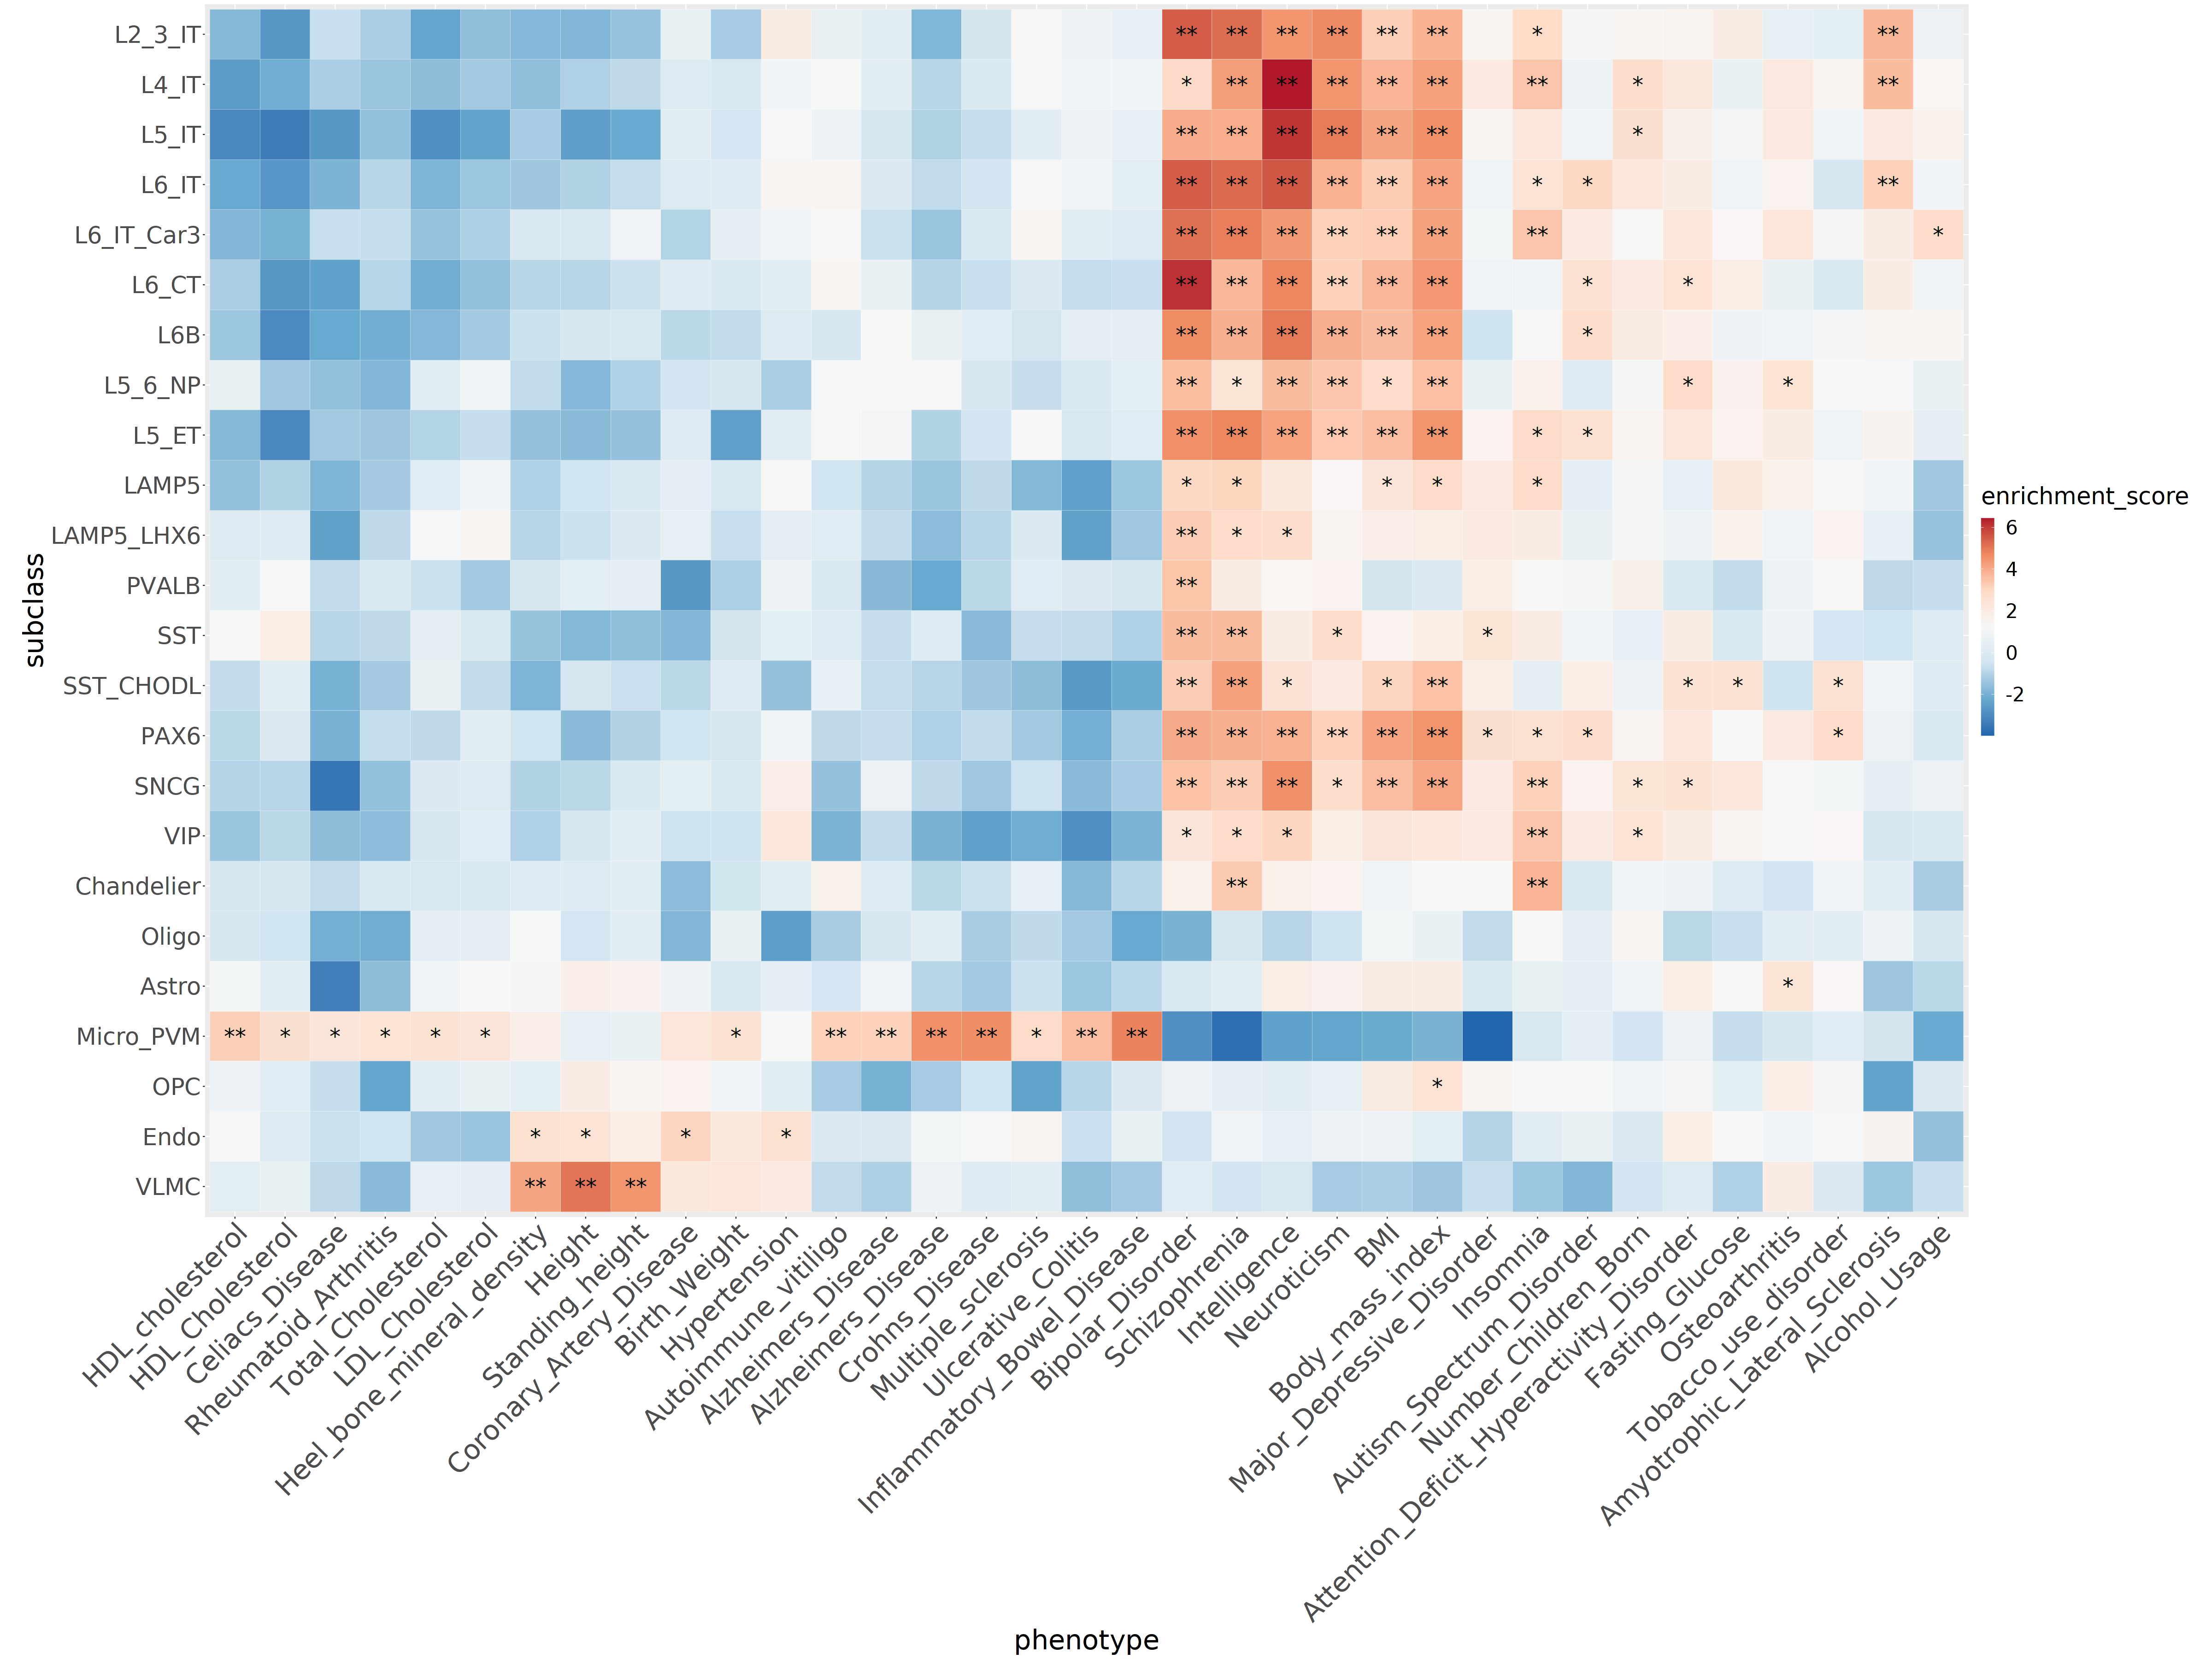

In [15]:
options(repr.plot.width = 40, repr.plot.height = 30)
plot <- ggplot(LDSC.results.plot, aes(x = phenotype, y = subclass, fill = enrichment_score, label = stars)) +
    geom_tile(color = 'white') +
    geom_text(size = 10) +
    scale_fill_distiller(palette = 'RdBu') + 
    coord_equal() +
    theme(
        axis.text.x = element_text(hjust = 1, angle = 45, size = 35),
        axis.text.y = element_text(size = 30),
        axis.title.x = element_text(size = 35),
        axis.title.y = element_text(size = 35),
        legend.key.height = unit(2, "cm"),
        legend.text = element_text(size = 25),
        legend.title = element_text(size = 30)
    ) +
    scale_x_discrete(label = sapply(strsplit(levels(LDSC.results.plot$phenotype), split = "[.]"), tail, 1))
ggsave(
    filename = "ALL_LDSC_enrichment.png",
    plot = plot,
    path = "/tscc/projects/ps-epigen/users/biy022/biccn/reports/20240419/figures/",
    device = "png",
    width = 40,
    height = 30,
    dpi = 320
)
plot

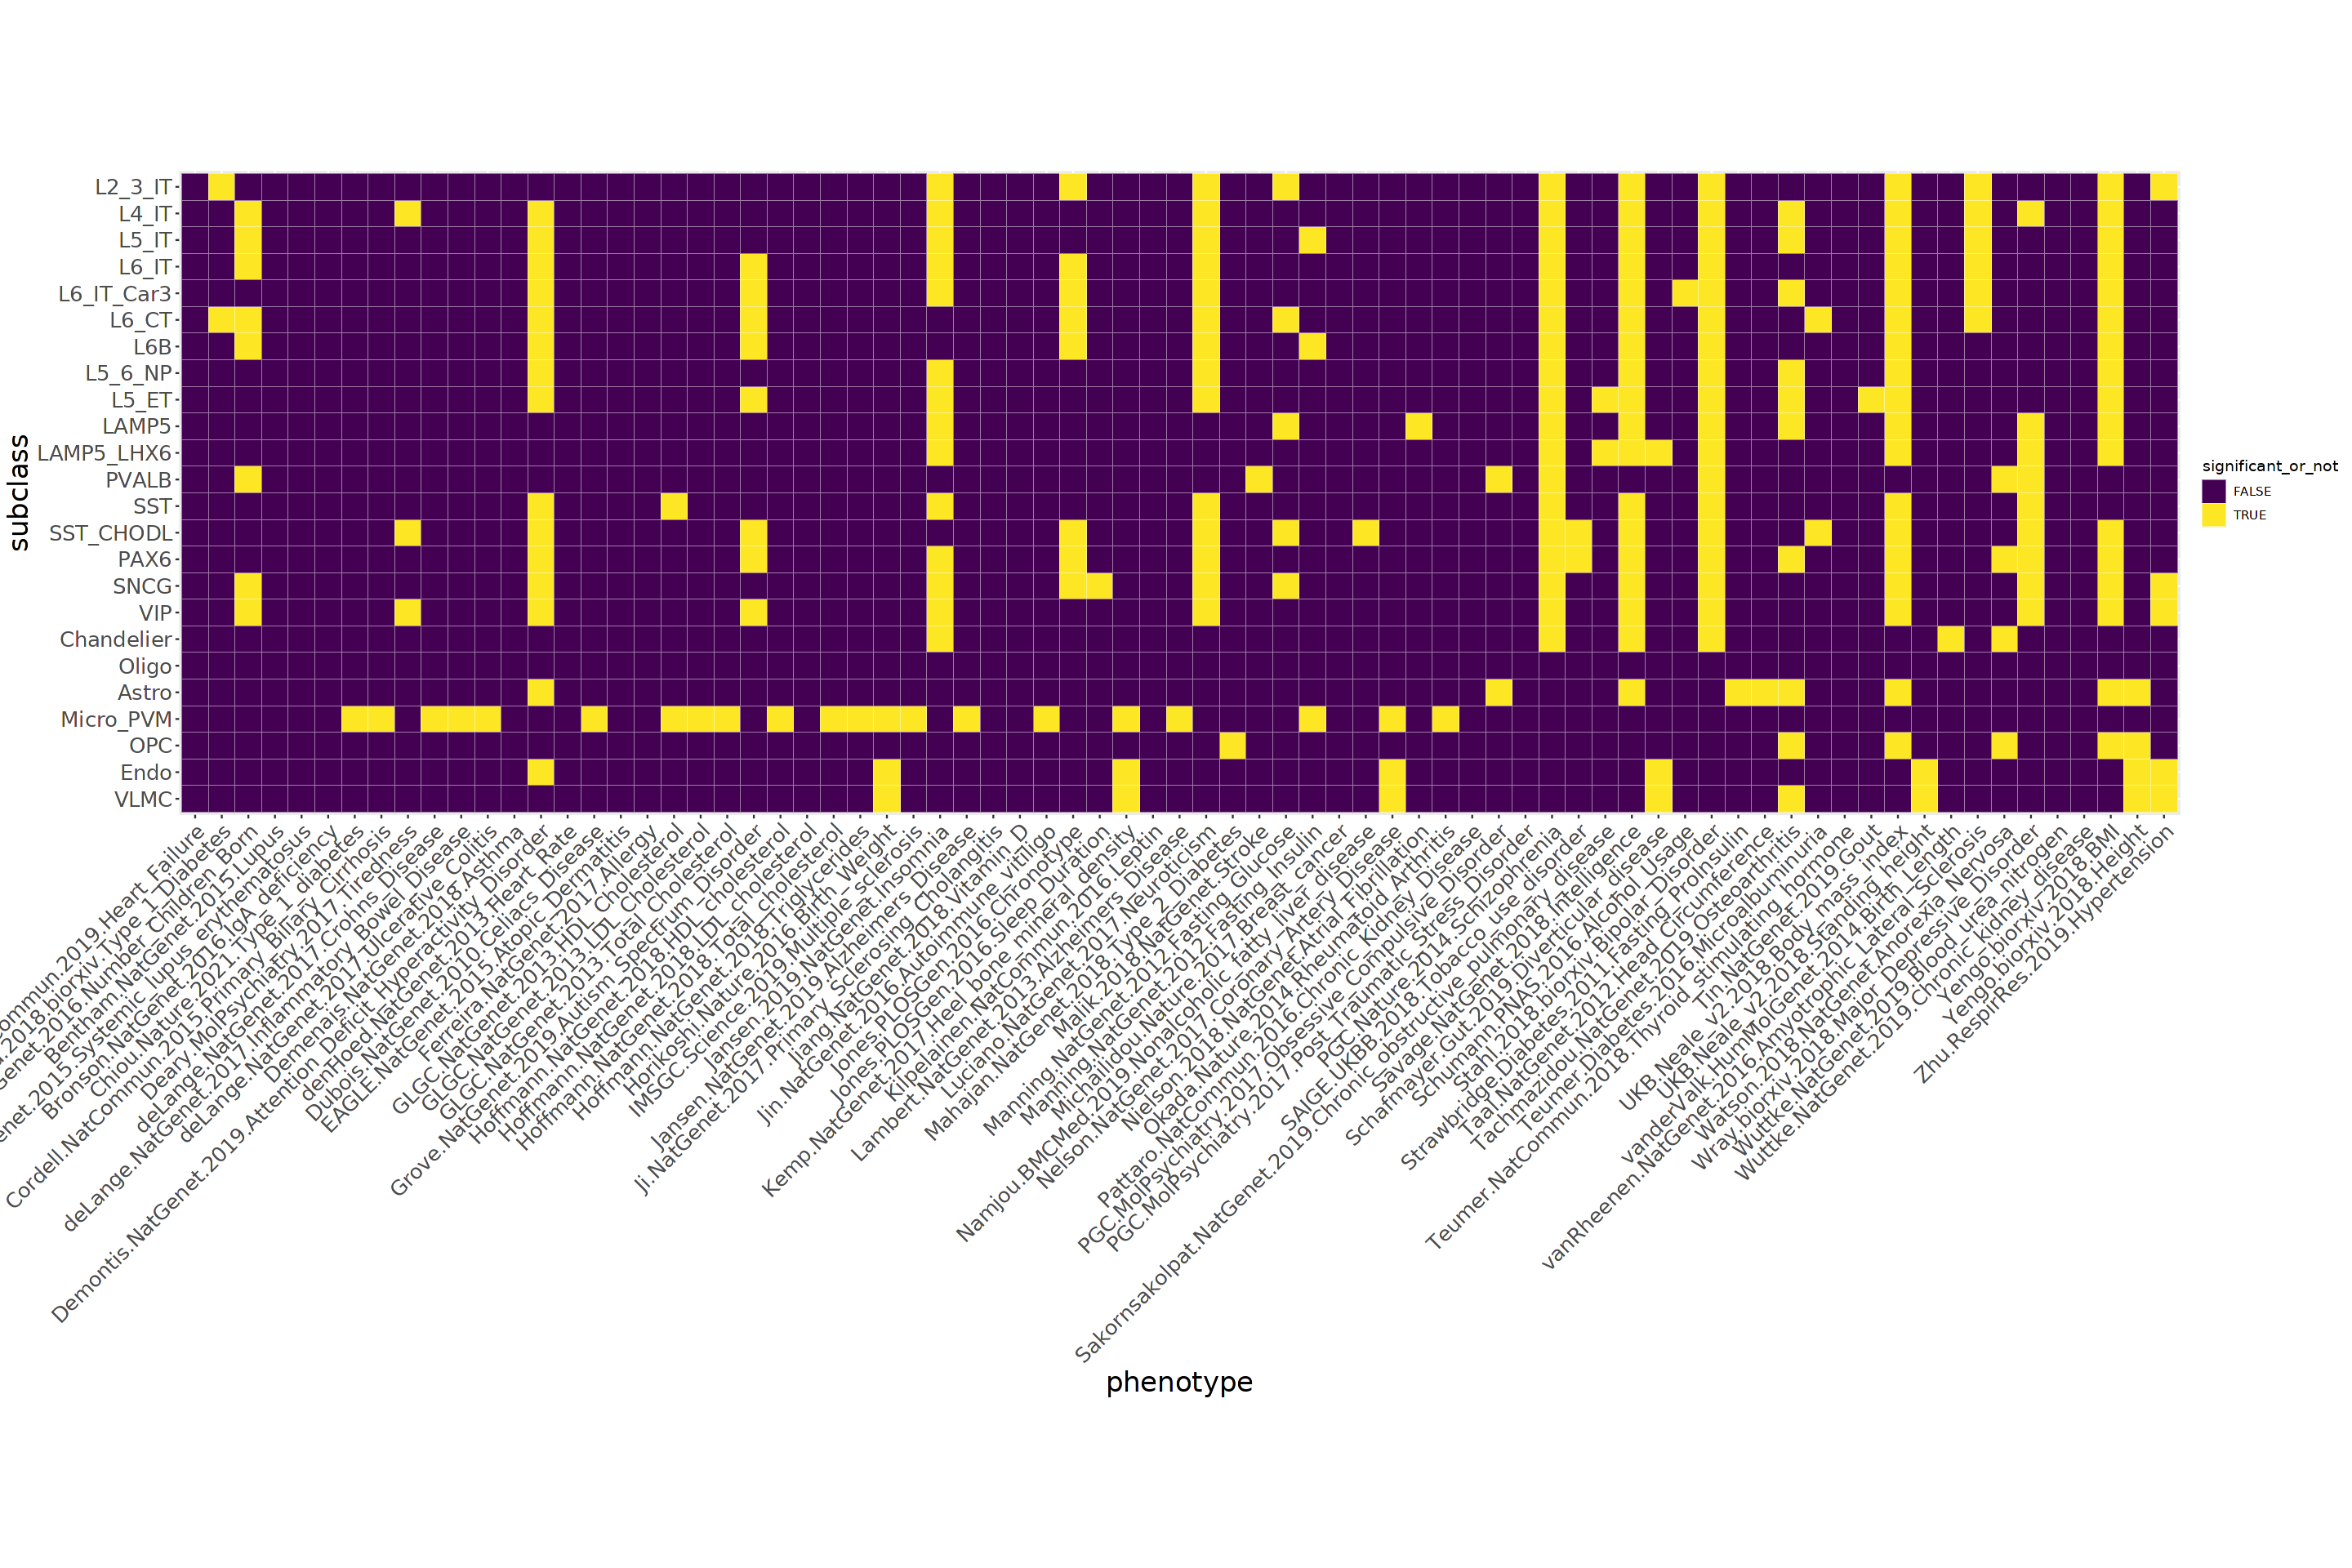

In [10]:
options(repr.plot.width = 24, repr.plot.height = 16)
plot <- ggplot(LDSC.results, aes(x = phenotype, y = subclass, fill = significant_or_not)) +
    geom_tile(color = 'white') +
    scale_fill_viridis_d(option = 'viridis') +
    coord_equal() +
    theme(
        axis.text.x = element_text(hjust = 1, angle = 45, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20)
    )
ggsave(
    filename = "ALL_LDSC_significance.png",
    plot = plot,
    path = "/tscc/projects/ps-epigen/users/biy022/biccn/reports/20240419/figures/",
    device = "png",
    width = 24,
    height = 16,
    dpi = 320
)
plot

In [11]:
LDSC.results |>
    dplyr::filter(pvalue < 0.05, subclass == 'Micro_PVM')

phenotype,subclass,coefficient,coefficient_ste,pvalue,qvalue,significant_or_not,enrichment_score,stars
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
GLGC.NatGenet.2013.Total_Cholesterol,Micro_PVM,1.691990e-07,6.627937e-08,5.342799e-03,7.818730e-02,TRUE,2.552816,*
GLGC.NatGenet.2013.LDL_Cholesterol,Micro_PVM,1.307704e-07,5.572524e-08,9.470249e-03,1.208968e-01,TRUE,2.346700,*
Cordell.NatCommun.2015.Primary_Biliary_Cirrhosis,Micro_PVM,5.082803e-07,2.440827e-07,1.865252e-02,1.932776e-01,TRUE,2.082410,
deLange.NatGenet.2017.Ulcerative_Colitis,Micro_PVM,2.661781e-07,7.388315e-08,1.574701e-04,4.547612e-03,TRUE,3.602691,**
Jin.NatGenet.2016.Autoimmune_vitiligo,Micro_PVM,2.560789e-07,8.051201e-08,7.347762e-04,1.593491e-02,TRUE,3.180630,**
Nelson.NatGenet.2017.Coronary_Artery_Disease,Micro_PVM,2.169754e-08,9.566875e-09,1.166502e-02,1.409197e-01,TRUE,2.267986,
Hoffmann.NatGenet.2018.Total_cholesterol,Micro_PVM,7.566040e-08,4.176576e-08,3.502855e-02,2.737131e-01,TRUE,1.811541,
Dubois.NatGenet.2010.Celiacs_Disease,Micro_PVM,3.664242e-07,1.563658e-07,9.554979e-03,1.211195e-01,TRUE,2.343379,*
Okada.Nature.2014.Rheumatoid_Arthritis,Micro_PVM,1.109051e-07,4.467681e-08,6.525291e-03,9.105057e-02,TRUE,2.482386,*
